<a href="https://colab.research.google.com/github/17092003vamsi/HUNTER/blob/main/meta_learner_ff_network_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KNN Validation Accuracy: 0.8333
Random Forest Validation Accuracy: 0.8817
SVM Validation Accuracy: 0.9247


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1475 - loss: 1.8179
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2630 - loss: 1.7217 
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4030 - loss: 1.6404 
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7686 - loss: 1.5662
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8601 - loss: 1.4768  
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8703 - loss: 1.3707 
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9173 - loss: 1.2449 
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8991 - loss: 1.1387  
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9399 - loss: 0.9629
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9090 - loss: 0.8815  
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9339 - loss: 0.6980 
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 

1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
KNN Test Accuracy: 0.8128
Random Forest Test Accuracy: 0.9305
SVM Test Accuracy: 0.9626
Meta-Learner (Neural Network) Test Accuracy: 0.9572

KNN Classification Report:
              precision    recall  f1-score   support

           A       1.00      0.97      0.99        36
         A-S       0.94      0.86      0.90        35
           G       0.67      0.81      0.74        43
         G-S       0.91      0.91      0.91        23
         HPM       0.57      0.62      0.59        21
       HPM-S       0.82      0.62      0.71        29

    accuracy                           0.81       187
   macro avg       0.82      0.80      0.80       187
weighted avg       0.83      0.81      0.81       187


Random Forest Classification Report:
              precision    recall  f1-score   support

           A       1.00      0.97      0.99        36
         A-S       1.00      0.94      0.97        35
           G       0.89      0.95      0.92       

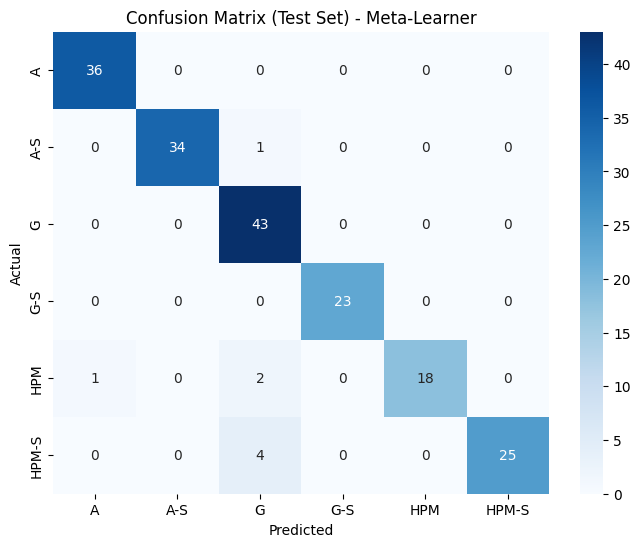

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load the dataset
file_path = 'project 2 sap.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Preprocessing
label_encoder = LabelEncoder()
data['Lable'] = label_encoder.fit_transform(data['Lable'])  # Encode target labels
y = data['Lable']
X = data.drop(columns=['Type', 'Lable'])

# Handle missing values and scale features
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# One-hot encode the labels for the neural network
y_val_onehot = to_categorical(y_val)
y_test_onehot = to_categorical(y_test)

# Base models
knn_model = KNeighborsClassifier(n_neighbors=5)
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(kernel='linear', probability=True)

# Train base models
knn_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Validation predictions
knn_val_preds = knn_model.predict(X_val)
rf_val_preds = rf_model.predict(X_val)
svm_val_preds = svm_model.predict(X_val)

# Calculate validation accuracies
knn_val_accuracy = accuracy_score(y_val, knn_val_preds)
rf_val_accuracy = accuracy_score(y_val, rf_val_preds)
svm_val_accuracy = accuracy_score(y_val, svm_val_preds)

print(f"KNN Validation Accuracy: {knn_val_accuracy:.4f}")
print(f"Random Forest Validation Accuracy: {rf_val_accuracy:.4f}")
print(f"SVM Validation Accuracy: {svm_val_accuracy:.4f}")

# Get probabilities for stacking
knn_val_proba = knn_model.predict_proba(X_val)
rf_val_proba = rf_model.predict_proba(X_val)
svm_val_proba = svm_model.predict_proba(X_val)

meta_X_val = np.hstack((knn_val_proba, rf_val_proba, svm_val_proba))

# Define and train the feedforward neural network as the meta-learner
meta_learner = Sequential([
    Dense(32, activation='relu', input_shape=(meta_X_val.shape[1],)),
    Dense(16, activation='relu'),
    Dense(y_val_onehot.shape[1], activation='softmax')
])

meta_learner.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
meta_learner.fit(meta_X_val, y_val_onehot, epochs=20, batch_size=16, verbose=1)

# Predictions on test set
knn_test_proba = knn_model.predict_proba(X_test)
rf_test_proba = rf_model.predict_proba(X_test)
svm_test_proba = svm_model.predict_proba(X_test)

meta_X_test = np.hstack((knn_test_proba, rf_test_proba, svm_test_proba))
meta_test_preds_proba = meta_learner.predict(meta_X_test)
meta_test_preds = np.argmax(meta_test_preds_proba, axis=1)

# Test accuracies for all models
knn_test_preds = knn_model.predict(X_test)
rf_test_preds = rf_model.predict(X_test)
svm_test_preds = svm_model.predict(X_test)

knn_test_accuracy = accuracy_score(y_test, knn_test_preds)
rf_test_accuracy = accuracy_score(y_test, rf_test_preds)
svm_test_accuracy = accuracy_score(y_test, svm_test_preds)
meta_test_accuracy = accuracy_score(y_test, meta_test_preds)

print(f"KNN Test Accuracy: {knn_test_accuracy:.4f}")
print(f"Random Forest Test Accuracy: {rf_test_accuracy:.4f}")
print(f"SVM Test Accuracy: {svm_test_accuracy:.4f}")
print(f"Meta-Learner (Neural Network) Test Accuracy: {meta_test_accuracy:.4f}")

# Classification reports
target_names = [str(label) for label in label_encoder.classes_]

print("\nKNN Classification Report:")
print(classification_report(y_test, knn_test_preds, target_names=target_names, zero_division=1))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_test_preds, target_names=target_names, zero_division=1))

print("\nSVM Classification Report:")
print(classification_report(y_test, svm_test_preds, target_names=target_names, zero_division=1))

print("\nMeta-Learner Classification Report:")
print(classification_report(y_test, meta_test_preds, target_names=target_names, zero_division=1))

# Confusion matrix for the meta-learner
conf_matrix = confusion_matrix(y_test, meta_test_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix (Test Set) - Meta-Learner')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
